In [13]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
# get input data

In [14]:
def print_df(df, dataset_name, filename_dataset, classifier, recur):
    if recur:
       recursive = 'Recursive'
    else:
       recursive = 'Non Recursive'
           
           
    if classifier == "<catboost.core.CatBoostClassifier object at 0x7f799c1b7fd0>":
      classifier = "CAT"
    if classifier == "GradientBoostingClassifier()":
      classifier = "GBC"
    if classifier == "RandomForestClassifier()":
      classifier = "RF"
    if classifier == "AdaBoostClassifier()":
      classifier = "ADA"
        
        
    for node_value in df["ensemble_criterion"].unique():
          fig, ax = plt.subplots()
          new_df = df.query(f'ensemble_criterion == \"{node_value}\"')
          #print(new_df)
          cover_value_0 = 0.0
          new_df = new_df[new_df[" cobertura"] != "0.0"]
          new_df = new_df[new_df[" cobertura"] != 0.0]
          grouped_df =  new_df.groupby(by=['ensemble_criterion', 'chi_square_percent_point_function','scale_feature_coefficient', 'min_accuracy_coefficient', 'min_number_class_per_node', 'sorting_method'], level=0)
    
          ax.scatter(grouped_df[" cobertura"].mean(), grouped_df[" RuleFit_f1_score"].mean(), color="yellow", label=f"{classifier}+RFIT", marker="x")
          ax.scatter(grouped_df[" cobertura"].mean(), grouped_df[" RuleCOSI_f1_score"].mean(), color="blue", label=f"{classifier}+RC", marker="*")
          ax.scatter(grouped_df[" cobertura"].mean(), grouped_df[" rules_f1_score"].mean(), color="red", label=f"{classifier}+SR", marker="+")
          # number_of_rules
          ax.set(
                 xlabel='Coverage',
                 ylabel='F1-Score',
                 title=f'{dataset_name} Coverage vs F1-Score -- {classifier} -- {recursive}')
          plt.legend(loc="lower left")
          #plt.ylim(0, 1.1)
          #plt.xlim(0, 1.1)
          plt.savefig(f'{filename_dataset}.png')
          plt.show()

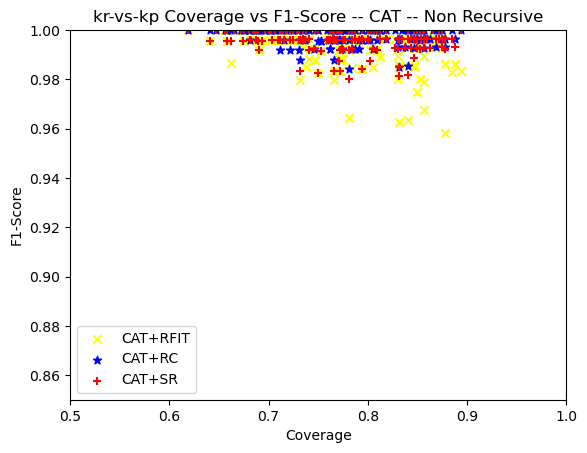

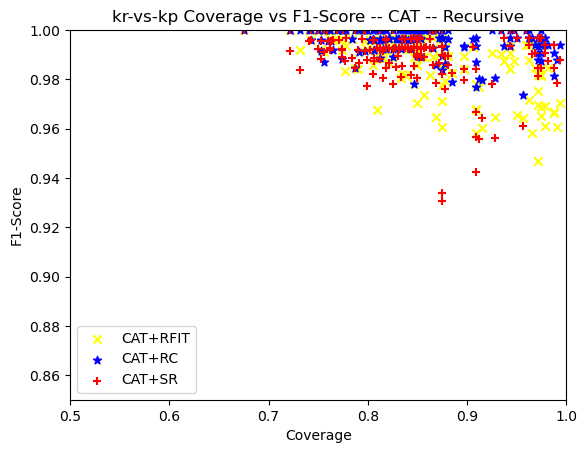

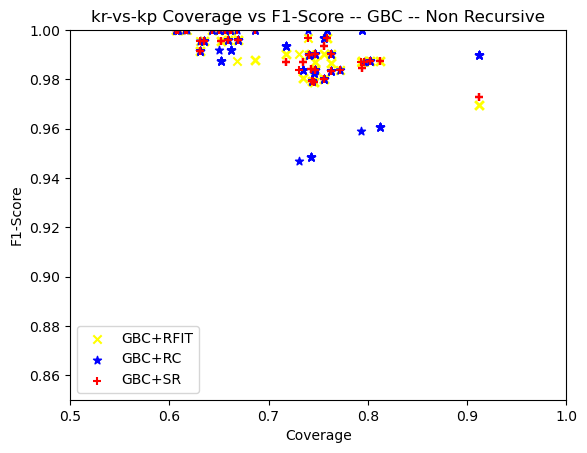

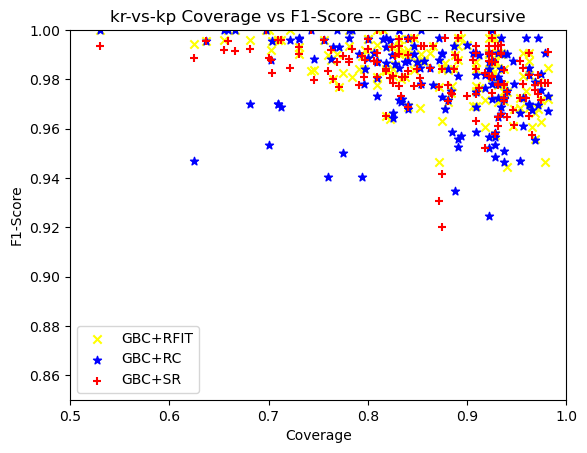

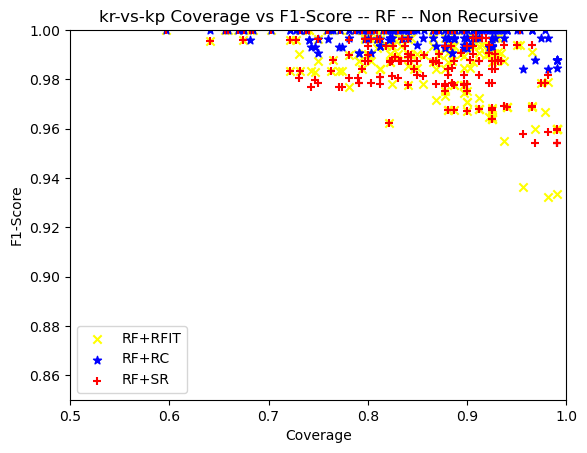

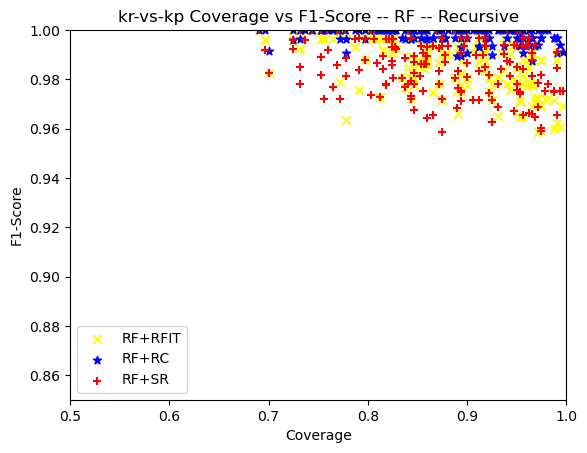

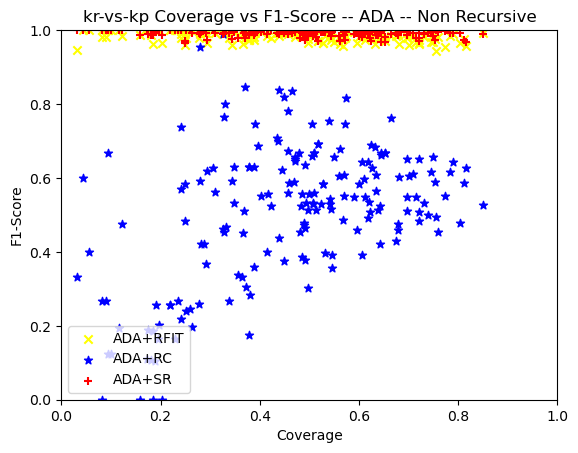

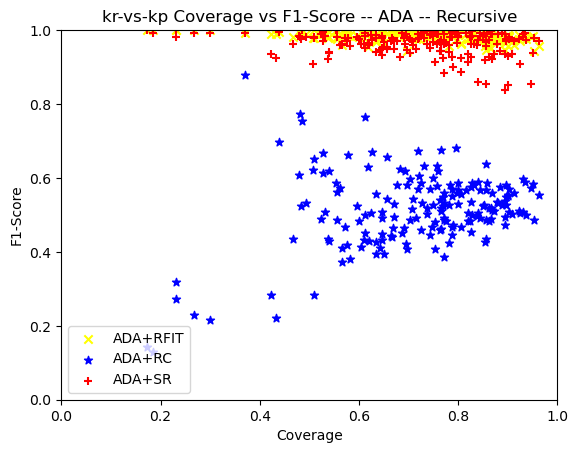

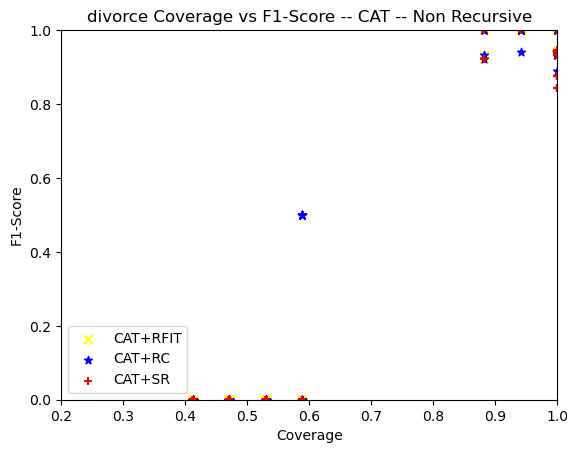

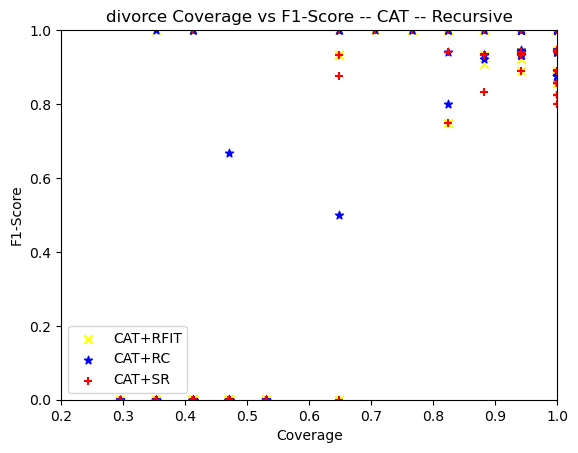

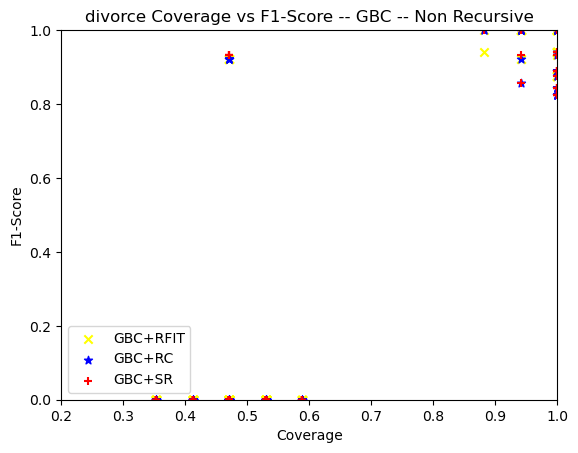

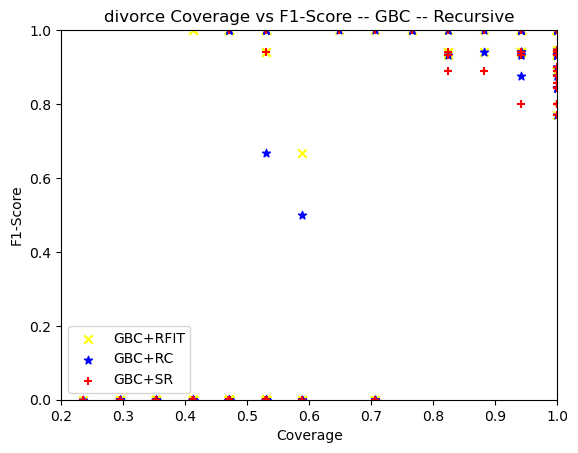

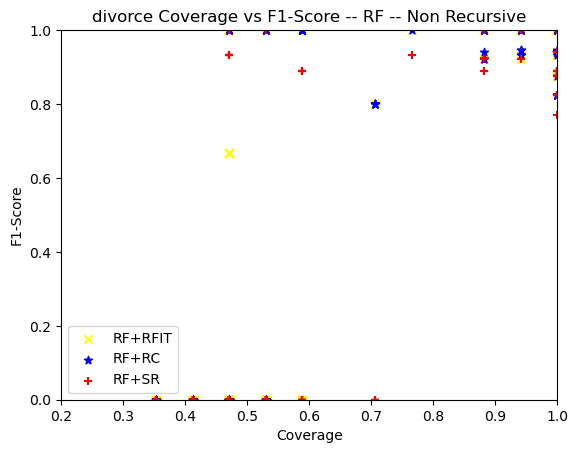

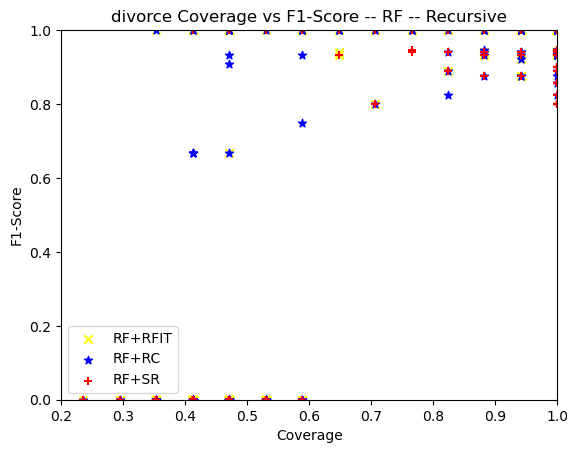

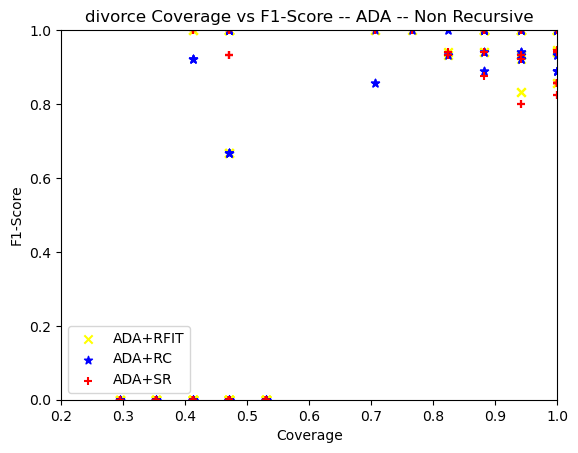

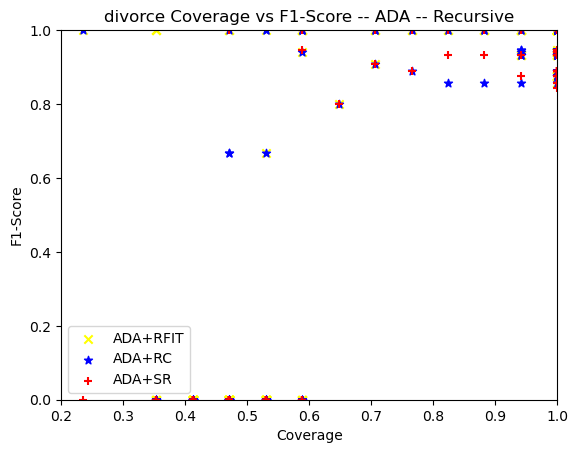

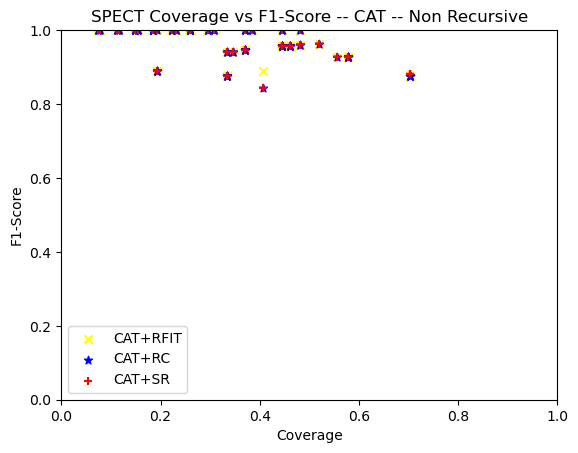

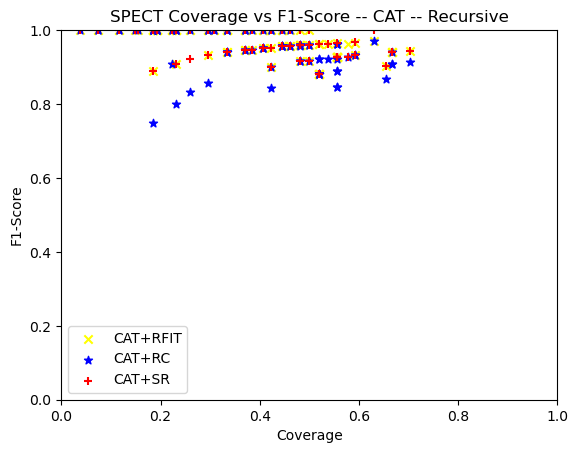

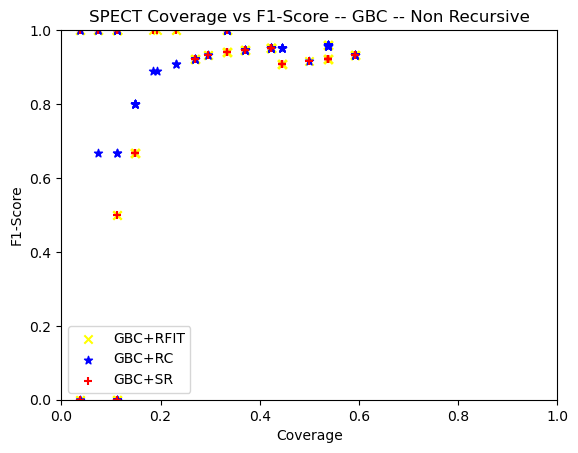

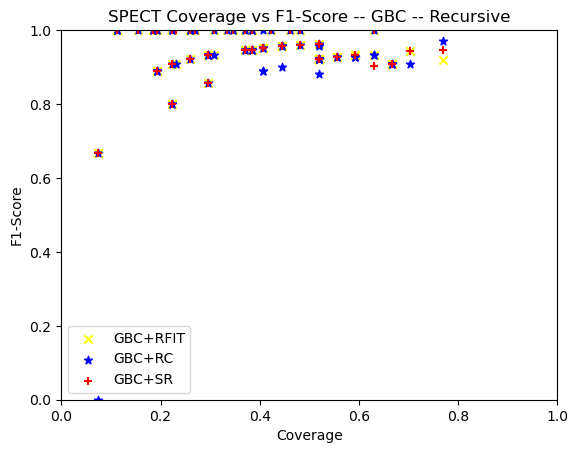

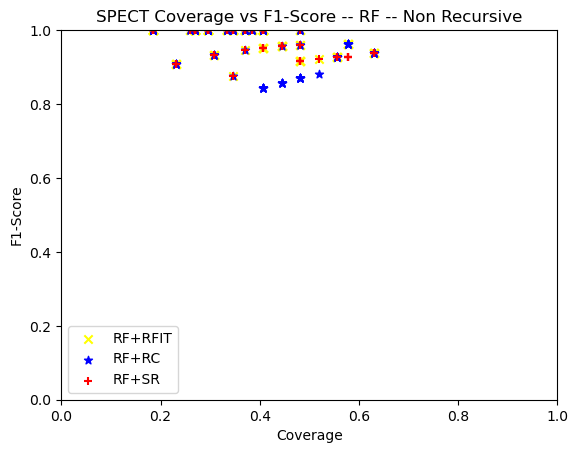

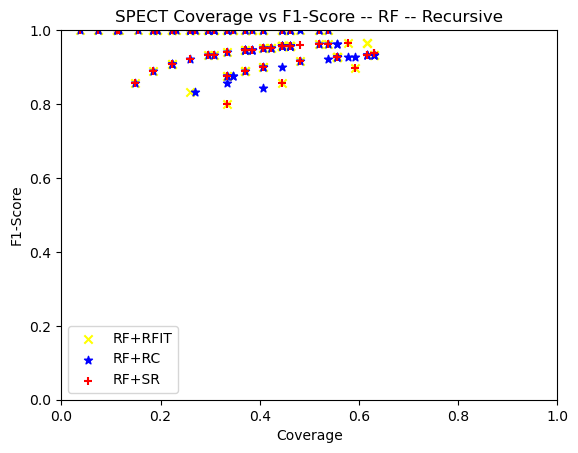

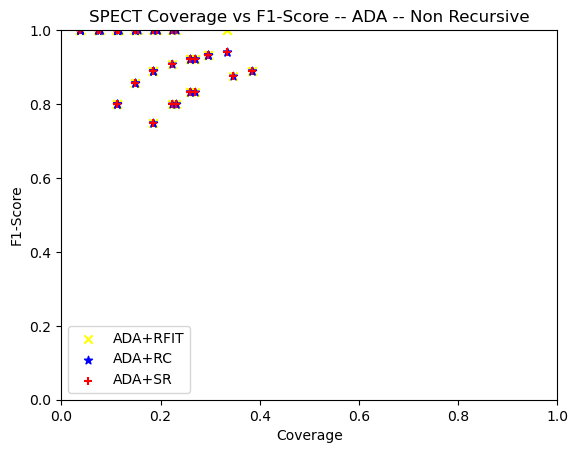

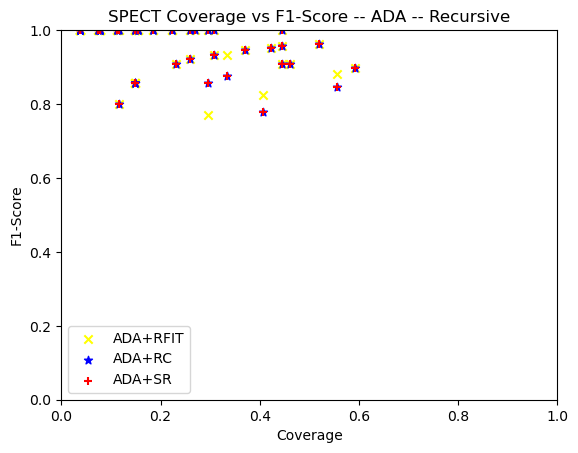

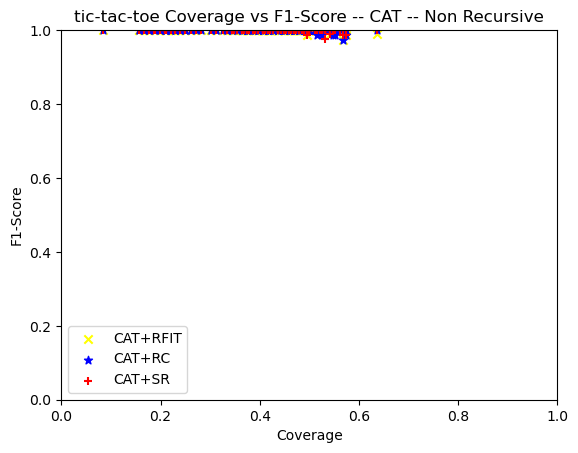

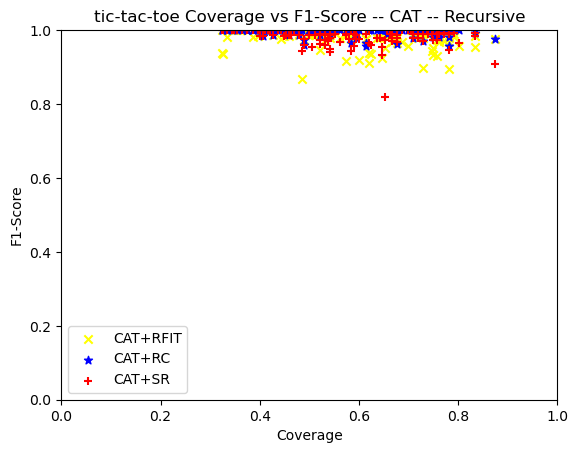

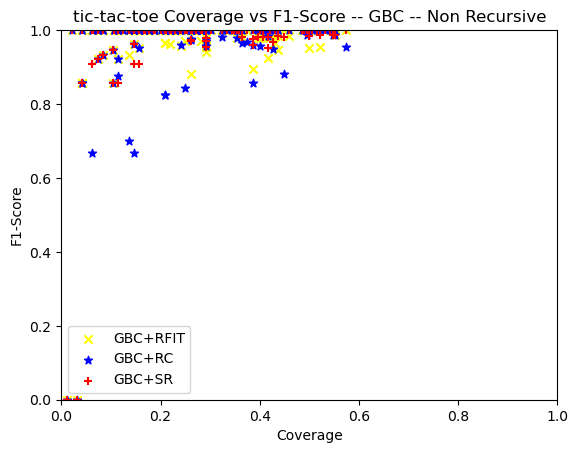

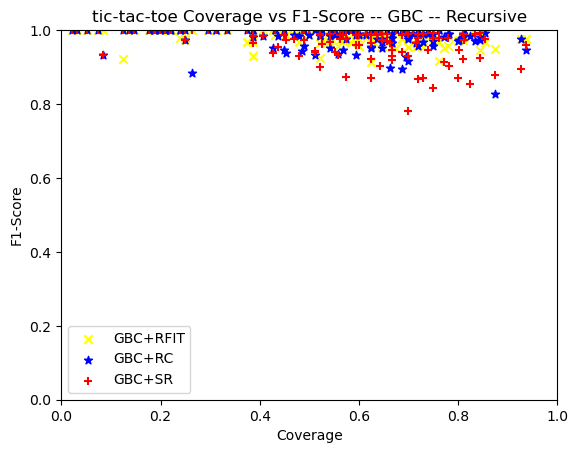

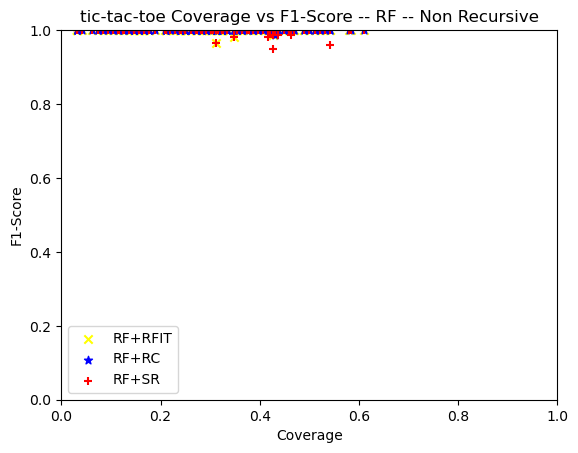

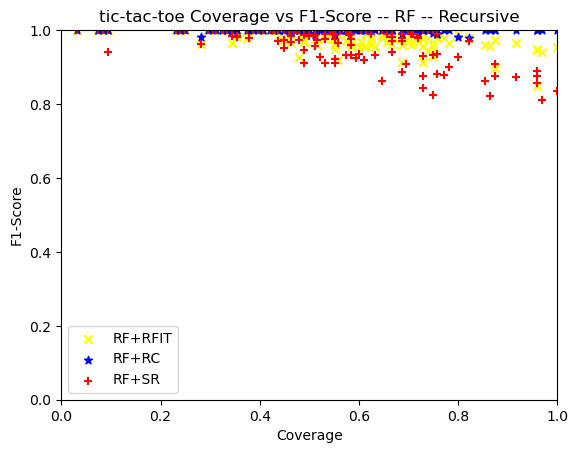

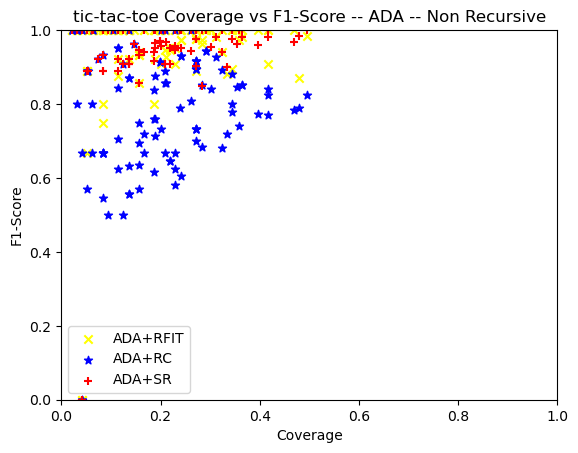

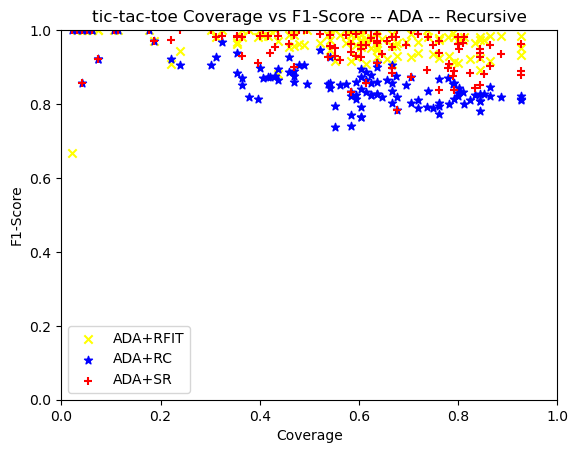

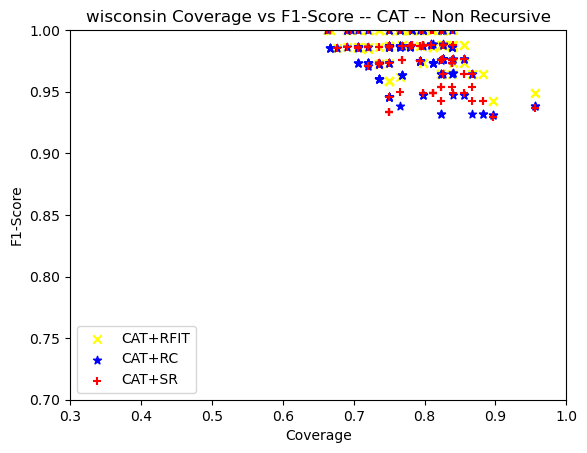

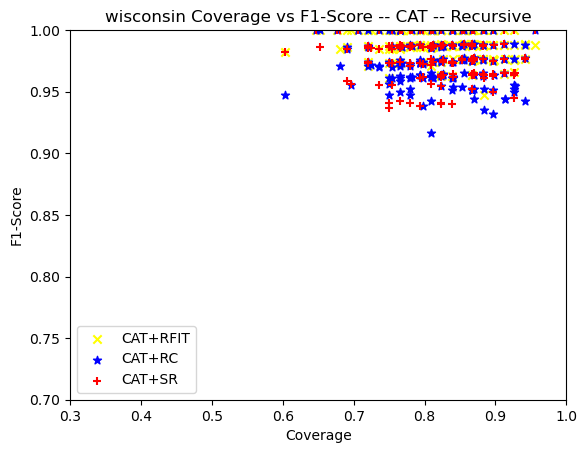

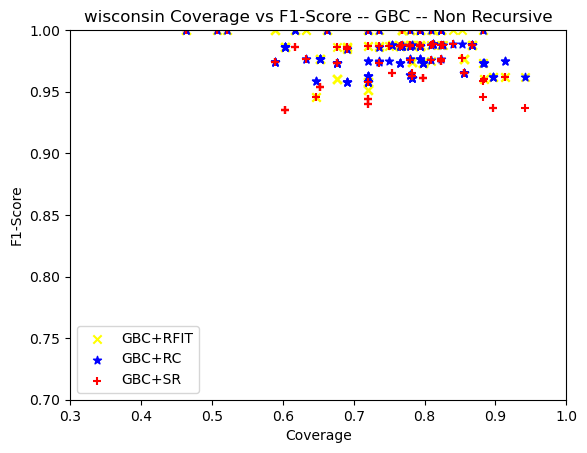

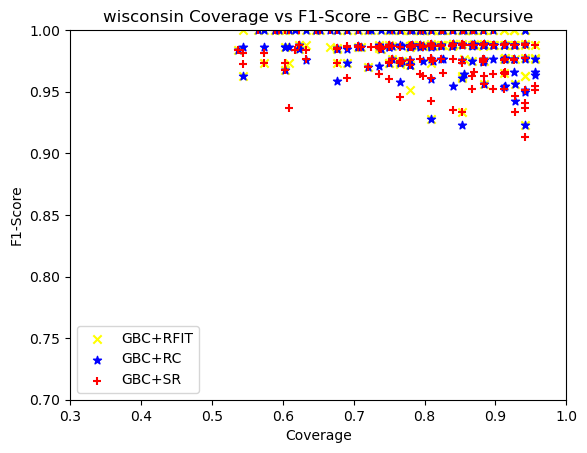

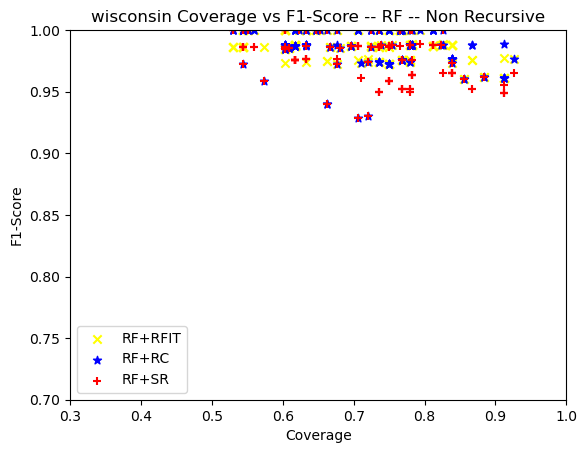

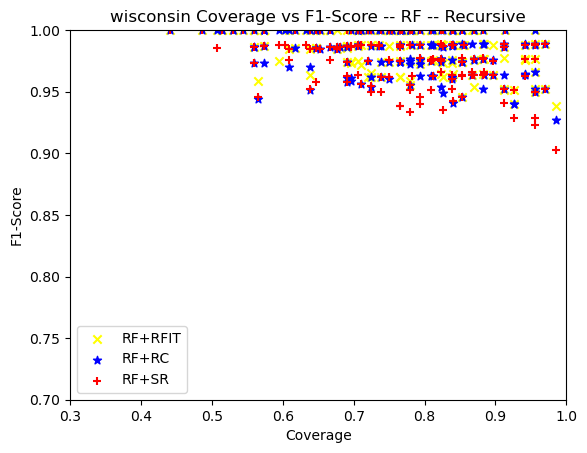

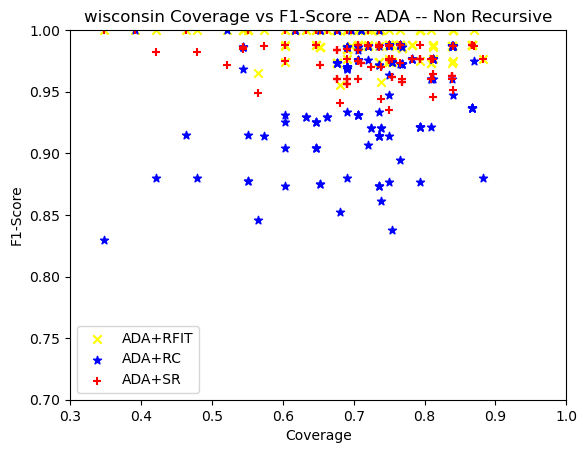

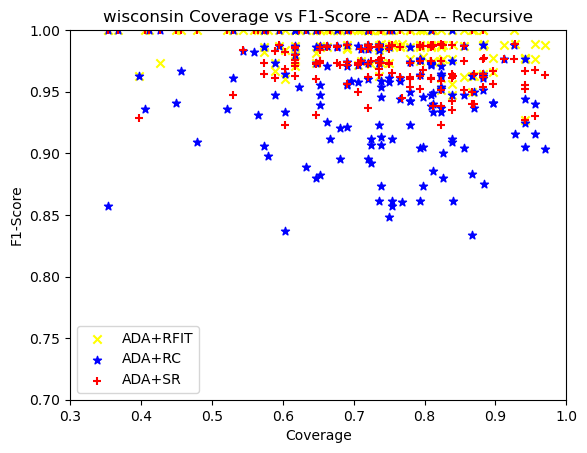

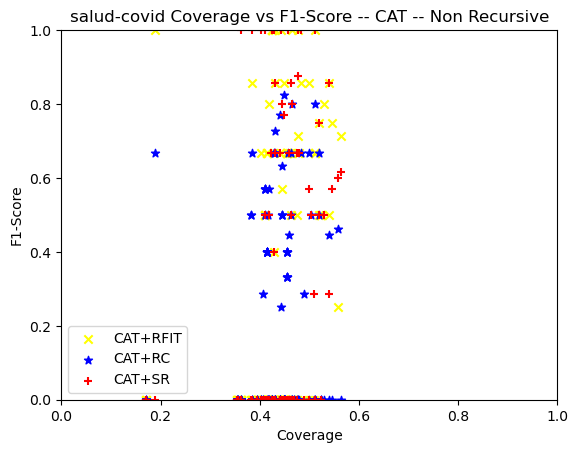

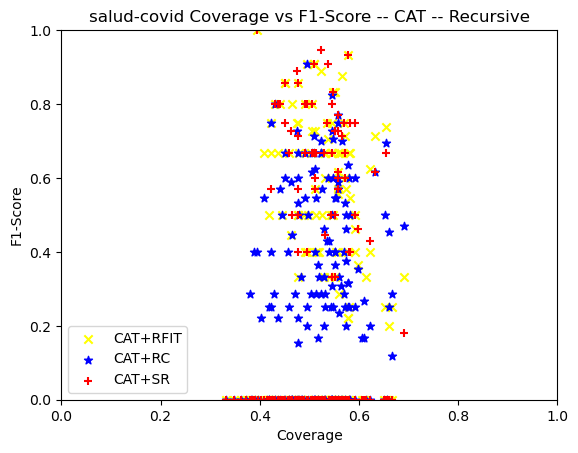

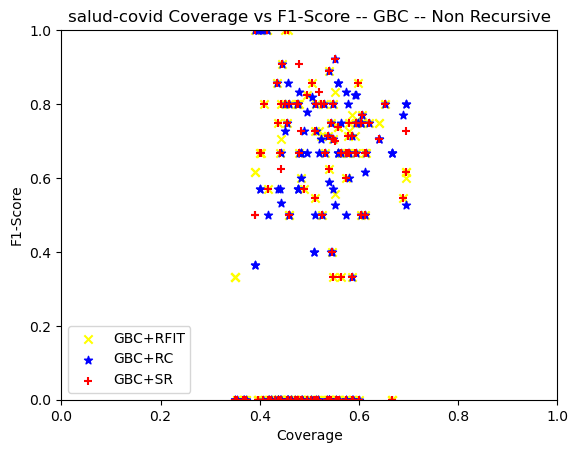

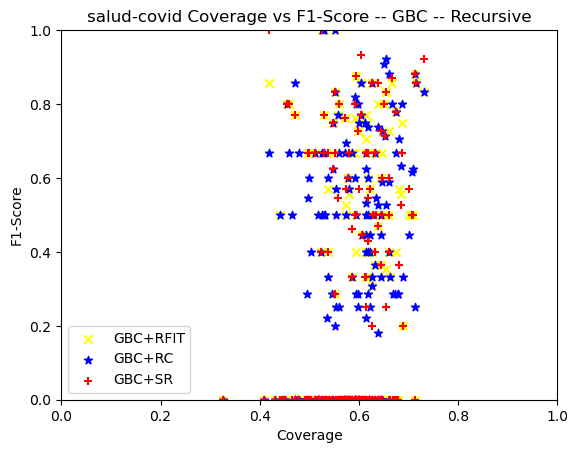

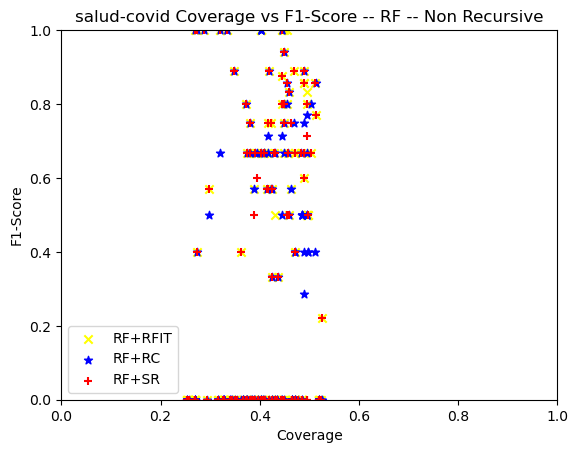

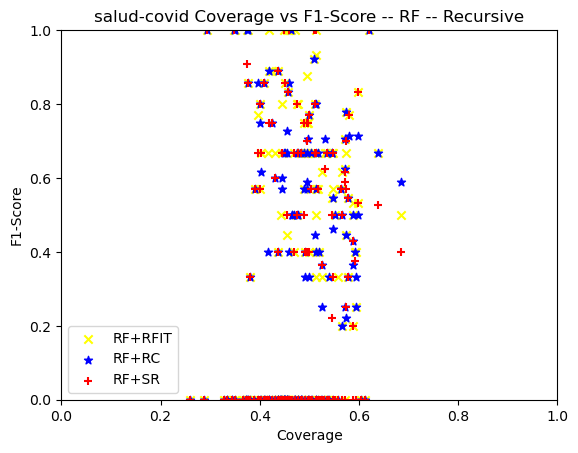

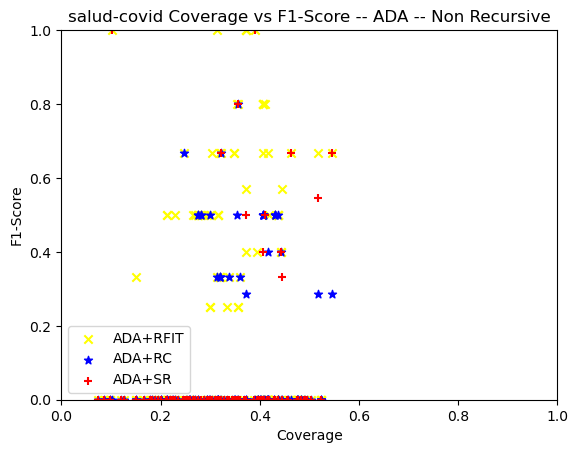

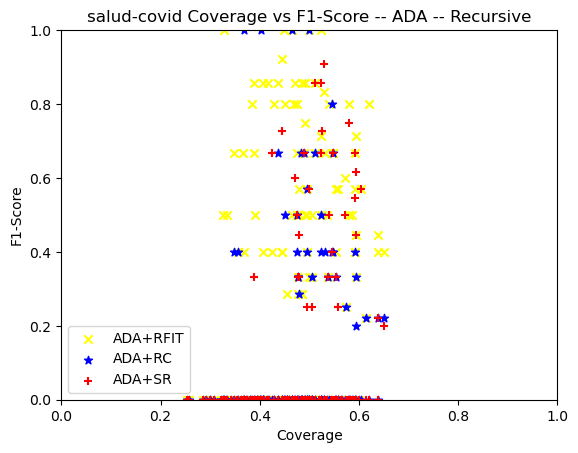

In [15]:




recursive = [False, True]


dataset_names = [
    "kr-vs-kp",
    "divorce",
    "SPECT",
    "tic-tac-toe",
    "wisconsin",
    "salud-covid",
]
classifiers = [
    "<catboost.core.CatBoostClassifier object at 0x7f799c1b7fd0>",
    "GradientBoostingClassifier()",
    "RandomForestClassifier()",
    "AdaBoostClassifier()",
    # XGBClassifier(),
    # LGBMClassifier(),
]
for filename in dataset_names:
    for classifier in classifiers:
        for recur in recursive:
              filename_dataset = f'./battery_{filename}_{classifier}_{recur}'
              df = pd.read_csv(f'{filename_dataset}.csv')
              print_df(df, filename, filename_dataset, classifier, recur)
